# Pendulum

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi, sin, cos
from IPython.display import SVG

%matplotlib inline


def centre_axes(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_smart_bounds(True)
    ax.spines['bottom'].set_smart_bounds(True)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

## Lagrangian dynamics
Take [Lagrangian dynamics](https://en.wikipedia.org/w/index.php?title=Lagrangian_mechanics) for granted.
- Let $U$ be the total [potential energy](https://en.wikipedia.org/wiki/Potential_energy) of the system.
- Let $T$ be the total [kinetic energy](https://en.wikipedia.org/wiki/Kinetic_energy) of the system, 
$ T = \frac{1}{2} \dot{q}^T M(q) \dot{q} = \frac{1}{2} \sum_k m_k \dot{q}^T \dot{q},\ $ where $M$ is a mass marix (inertia matrix) that depends on state $q$.
- Let $L = T - U$
- Let $Q_i$ be the [generalised force](https://en.wikipedia.org/wiki/Generalized_forces) corresponding to position $q_i$

Then the Lagrangian dynamic equations are: 
$$
    Q_i = \frac{d}{dt} \frac{\partial L}{\partial \dot{q}_i} - \frac{\partial L}{\partial q_i}
$$

## Simple pendulum

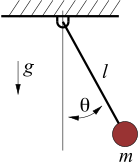

In [2]:
g = 9.81
m = 7
l = 1
SVG('./pendulum_simple.svg')

## We can derive the equations of motion for the simple pendulum
- Let the state be the single position described by the angle of the pendulum, i.e. $q = \theta$, 
- Let $p$ denote the position of $m$

$
p = l [\sin\theta, -\cos\theta ]^T  \\
\dot{p} = l \dot\theta [\cos\theta, \sin\theta]^T \\
T = \frac{1}{2} m \dot{p}^T\dot{p} = \frac{1}{2} m l^2 \dot{\theta}^2 
\ \ (\text{because } [\cos\theta, \sin\theta][\cos\theta, \sin\theta]^T) = 1\\ 
U = m g p_1 = - m g l \cos\theta \\
L = T - U = \frac{1}{2} m l^2 \dot\theta^2 + m g l \cos\theta \\
\frac{d}{dt} \frac{\partial L}{\partial \dot{q}} =
\frac{d}{dt} \frac{\partial L}{\partial \dot{\theta}} = m l^2 \ddot{\theta} \\
\frac{\partial L}{\partial q} =
\frac{\partial L}{\partial \theta} = - m g l \sin\theta \\
$

$$ Q = \frac{d}{dt} \frac{\partial L}{\partial \dot{q}} - \frac{\partial L}{\partial q} = 
       m l^2 \ddot\theta(t) + mgl\sin\theta(t) \\
$$

To be specific, consider the case where the generalized force $Q$ models a damping torque (from friction) plus a control torque input $u(t)$:
$$ Q = u(t) - b\dot{\theta}(t) $$

## What's the long-term behaviour of the pendulum?
The torque at time $t$ is $ u(t) = m l^2 \ddot\theta(t) + b\dot{\theta}(t) + mgl\sin{\theta(t)} $

Let's make two simplification:
1. Consider the case where torque $u$ is constant, i.e. does _not_ depend on time:
$$ u_0 = ml^2\ddot\theta + b \dot\theta + mgl \sin\theta $$

2. Start with the "over damped" case (using $\sqrt\frac{l}{g}$ to match units): 
$$ b \sqrt\frac{l}{g} \gg ml^2 $$

In this case  $ b\dot\theta \approx u_0 - mgl\sin\theta $ and **the system is approximately first-order**.

Let's state by plotting $\dot\theta$ vs $\theta$. First, let's ignore the fact that the pendulum wraps around every $2\pi$, so we have an equation of the form $\dot x = \frac{1}{b}(u + c \sin x)$

In [3]:
def x_dot(x, u0=0, m=1, l=1, b=1):
    g = 9.81
    return (u0 - m*g*l * sin(x)) / b

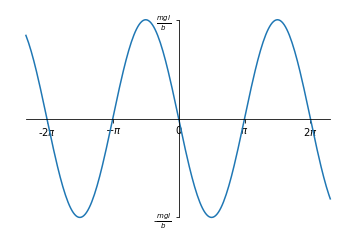

In [4]:
x = np.arange(-2*pi-1, 2*pi+1, pi/50)
plt.plot(x, x_dot(x, m=m, l=l))
pi_ticks = np.arange(-2*pi, 2*pi+1, pi)
pi_labels = ['-2$\pi$', '$-\pi$', '0', '$\pi$', '2$\pi$']
plt.xticks(pi_ticks, pi_labels)
plt.yticks([-m*g*l, m*g*l], [r'-$\frac{mgl}{b}$',r'$\frac{mgl}{b}$'])
centre_axes()

When $u=0$, $\dot x$ is just a sin wave and has "steady states" at $x^* \in \{..., -\pi, 0, \pi, 2\pi, ...\}$. 
- If $x(0) = x^*$, then we know $x(\infty) = x^*$. 
- What about if $x(0) = x^*+\epsilon$? 
- If $\lvert u_0 \rvert > \frac{mgl}{b}$, the pendulum will turn forever 

## The undamped pendulum with no torque
Consider the same system but now with $b=0$, i.e. $$ u_0 = ml^2\ddot\theta + mgl \sin\theta $$
This is truly second-order, but we can write any (time independent) second-order system $\ddot{q} = f(q, \dot q, u)$ as as two-dimensional first-order system $x_1 = \theta, \ \dot x_1 = \dot \theta = x_2, \ \dot x_2 = f(x_1, x_2, u)$

This means we can plot the vectors $[ \dot x_1, \dot x_2 ]^T$ over the domain $(x_1, x_2)$

How do we plot the vectors?

When $u = 0$, using our calculations from the start:
$T = \frac{1}{2} m l^2 \dot \theta^2, \ U = - m g l \cos\theta$ and the total energy is 
$E(\theta, \dot \theta) = T(\dot \theta) + U(\theta)$

By conservation of energy, $E(\theta(t), \dot \theta(t)) = E(\theta(t), \dot \theta(t)) = E_0$. Plugging in to the equations above and rearranging we get
$$
\frac{1}{2} m l^2 \dot \theta^2 - m g l \cos\theta = E_0 \\
\dot \theta = \pm \sqrt{\frac{2}{ml^2}[E_0 + mgl\cos\theta ]} 
$$


In [250]:
plt.plot(theta[:,0], x1_dot[:,0]);

SyntaxError: invalid syntax (<ipython-input-250-166383a9ab4c>, line 1)

In [244]:
x1_dot.shape

(100, 100)

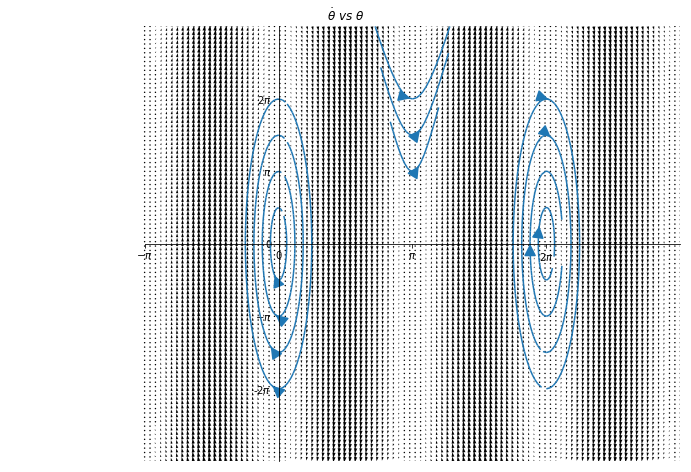

In [5]:
def energy(theta, theta_dot):
    T = 0.5*m*l**2 * theta_dot**2
    U = -m*g*l * cos(theta)
    return T + U

theta_dot, theta = np.mgrid[-3*pi:3*pi:100j, -pi:3*pi:100j]  # requires y, x ordering for unknown reason
x1_dot = np.sign(theta_dot) * np.sqrt( 2/(m*l**2) * (energy(theta, theta_dot) + m*g*l*cos(theta)))
assert(np.allclose(x1_dot, theta_dot))
x2_dot = -m*g*l * sin(theta)

plt.figure(figsize=(12,8))
plt.quiver(theta, theta_dot, x1_dot, x2_dot)
start_points = np.array(list(zip([0, 0, 0, 0, pi, pi, pi, pi, 2*pi, 2*pi, 2*pi, 2*pi],
                                 [2*pi, 1.5*pi, pi, 0.5*pi, 2*pi, 1.5*pi, pi, 0.5*pi, -2*pi, -1.5*pi, -pi, -0.5*pi])))
plt.streamplot(theta, theta_dot, x1_dot, x2_dot, arrowsize=2.5,
               start_points=start_points, density=[2,3])
plt.xticks(pi_ticks, pi_labels)
plt.yticks(pi_ticks, pi_labels)
plt.title(r'$\dot \theta \ vs \ \theta$')
centre_axes()
plt.show()

In [6]:
start_points.shape

(12, 2)

## The undamped pendulum with a constant torque

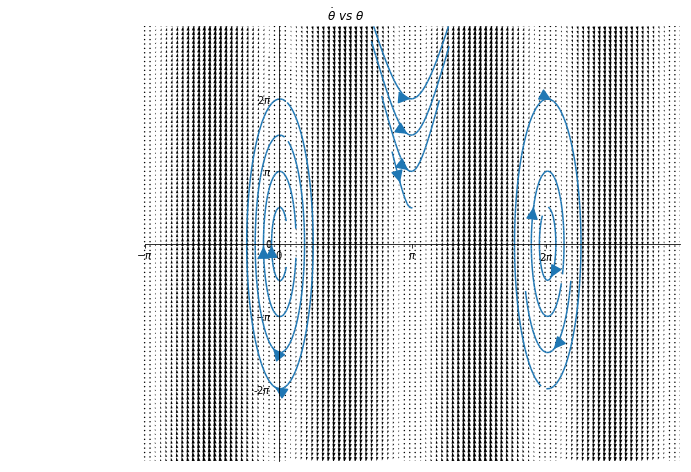

In [6]:
u = 2  # torque
x2_dot = -m*g*l * sin(theta) + u

plt.figure(figsize=(12,8))
plt.quiver(theta, theta_dot, theta_dot, x2_dot)
plt.streamplot(theta, theta_dot, x1_dot, x2_dot, arrowsize=2.5, 
               start_points=start_points, density=[2,3])
plt.xticks(pi_ticks, pi_labels)
plt.yticks(pi_ticks, pi_labels)
plt.title(r'$\dot \theta \ vs \ \theta$')
centre_axes()
plt.show()

## The damped pendulum

array([[ 0.        ,  6.28318531],
       [ 0.        ,  4.71238898],
       [ 0.        ,  3.14159265],
       [ 0.        ,  1.57079633],
       [ 6.28318531,  6.28318531],
       [ 6.28318531,  4.71238898],
       [ 6.28318531,  3.14159265],
       [ 6.28318531,  1.57079633],
       [ 6.28318531, -6.28318531],
       [ 6.28318531, -4.71238898],
       [ 6.28318531, -3.14159265],
       [ 6.28318531, -1.57079633]])

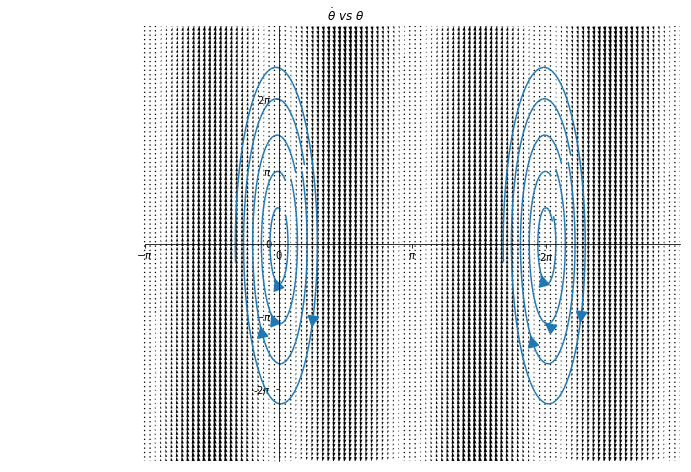

In [7]:
b = 0.5  # damping
x2_dot = -m*g*l * sin(theta) - b*theta_dot

plt.figure(figsize=(12,8))
plt.quiver(theta, theta_dot, theta_dot, x2_dot)
start_points = np.array(list(zip([0, 0, 0, 0, pi, pi, pi, pi, pi, pi, pi, pi],
                                 [2*pi, 1.5*pi, pi, 0.5*pi, 2*pi, 1.5*pi, pi, 0.5*pi, -2*pi, -1.5*pi, -pi, -0.5*pi])))
start_points = [2,1]*start_points
plt.streamplot(theta, theta_dot, x1_dot, x2_dot, arrowsize=2.5, 
               start_points=start_points, density=[2,3])
plt.xticks(pi_ticks, pi_labels)
plt.yticks(pi_ticks, pi_labels)
plt.title(r'$\dot \theta \ vs \ \theta$')
centre_axes()
plt.show()